In [2]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings_data = pd.read_csv('/content/drive/MyDrive/Classroom/DS304 Visualization (Aug - Nov 2024) DSAI/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
items_data = pd.read_csv('/content/drive/MyDrive/Classroom/DS304 Visualization (Aug - Nov 2024) DSAI/ml-100k/u.item', sep='|', encoding='ISO-8859-1', names=['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'])
user_data = pd.read_csv('/content/drive/MyDrive/Classroom/DS304 Visualization (Aug - Nov 2024) DSAI/ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip code'])

In [5]:
ratings_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
items_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
user_data.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
item_id_count = ratings_data['item_id'].nunique()
movie_id_count = items_data['movie_id'].nunique()

print("item_id count:", item_id_count)
print("movie_id count:", movie_id_count)

item_id count: 1682
movie_id count: 1682


In [9]:
merged_data = pd.merge(ratings_data, items_data, left_on='item_id', right_on='movie_id', how='inner')

In [10]:
data = pd.merge(merged_data, user_data, on='user_id', how='inner')

In [11]:
data.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,0,0,0,0,49,M,writer,55105


In [12]:
data.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'age',
       'gender', 'occupation', 'zip code'],
      dtype='object')

In [13]:
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]
df_melted = data.melt(id_vars=[col for col in data.columns if col not in genre_columns],
                    value_vars=genre_columns,
                    var_name='genre',
                    value_name='is_genre')

# Filtering the melted DataFrame to retain only rows where `is_genre` is 1 (indicating that the genre is present)
df = df_melted[df_melted['is_genre'] == 1].drop('is_genre', axis=1)

# Display the resulting DataFrame
df.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,age,gender,occupation,zip code,genre
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,49,M,writer,55105,Action
10,196,173,2,881251820,173,"Princess Bride, The (1987)",01-Jan-1987,NaN,http://us.imdb.com/M/title-exact?Princess%20Br...,0,49,M,writer,55105,Action
25,196,110,1,881252305,110,Operation Dumbo Drop (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Operation%20D...,0,49,M,writer,55105,Action
41,63,257,3,875747342,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,31,M,marketing,75240,Action
42,63,222,3,875747635,222,Star Trek: First Contact (1996),22-Nov-1996,NaN,http://us.imdb.com/M/title-exact?Star%20Trek:%...,0,31,M,marketing,75240,Action


What is the average rating for each movie genre?


<ipython-input-14-b64d4cc31226>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=average_ratings_by_genre.index, y=average_ratings_by_genre, palette='viridis')


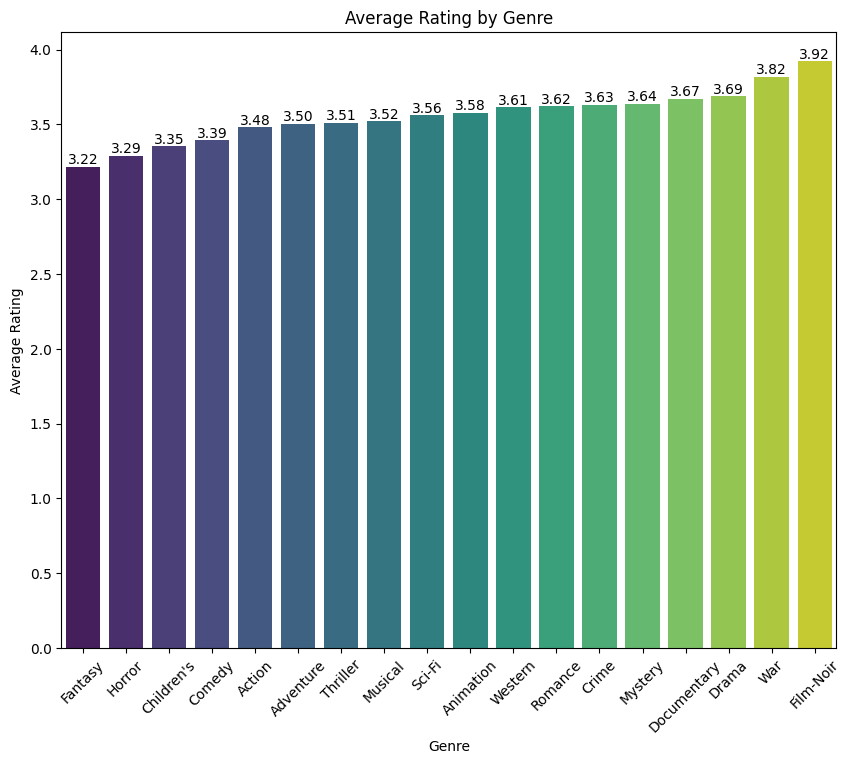

In [14]:
average_ratings_by_genre = df.groupby('genre')['rating'].mean().sort_values()

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=average_ratings_by_genre.index, y=average_ratings_by_genre, palette='viridis')

for index, value in enumerate(average_ratings_by_genre):
    barplot.text(index, value, f'{value:.2f}', color='black', ha="center", va="bottom")

plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Which genres are the most popular based on the number of ratings received?


In [15]:
ratings_by_genre = df.groupby('genre')['rating'].count().sort_values(ascending=False)

# Display the results
print("Number of Ratings by Genre:")
print(ratings_by_genre)

Number of Ratings by Genre:
genre
Drama          39895
Comedy         29832
Action         25589
Thriller       21872
Romance        19461
Adventure      13753
Sci-Fi         12730
War             9398
Crime           8055
Children's      7182
Horror          5317
Mystery         5245
Musical         4954
Animation       3605
Western         1854
Film-Noir       1733
Fantasy         1352
Documentary      758
Name: rating, dtype: int64


<ipython-input-16-3c3957fde30f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_by_genre.index, y=ratings_by_genre, palette='coolwarm')


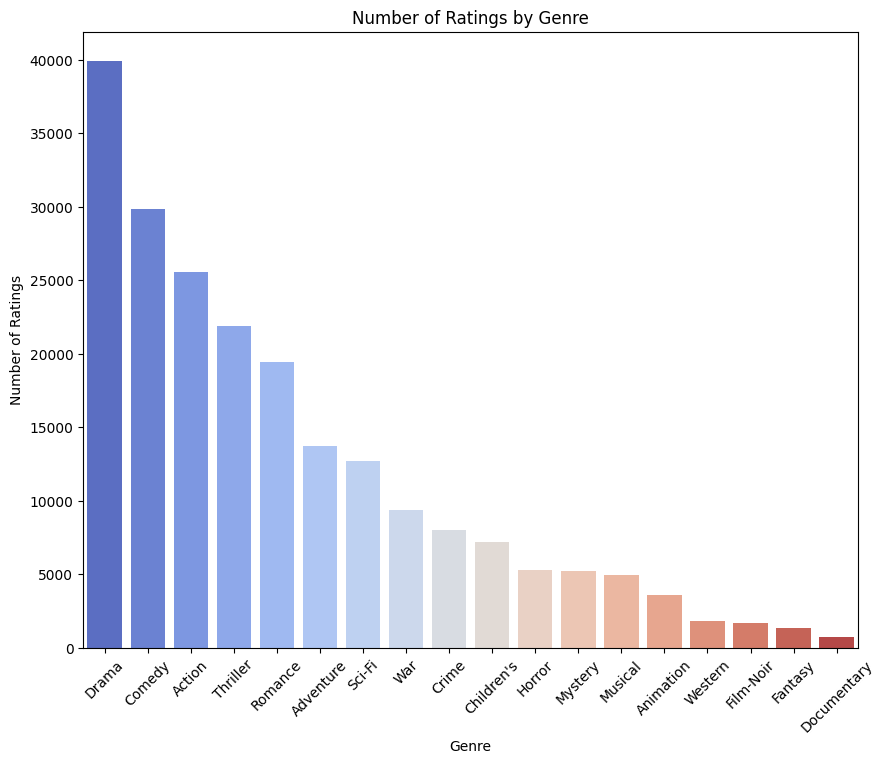

In [16]:
plt.figure(figsize=(10, 8))
sns.barplot(x=ratings_by_genre.index, y=ratings_by_genre, palette='coolwarm')

plt.title('Number of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

Which movies (Top-10) have received the highest number of ratings?


In [17]:
ratings_by_movie = df.groupby('movie_title')['rating'].count().sort_values(ascending=False)

top_10_movies = ratings_by_movie.head(10)

print("Top 10 Movies with the Highest Number of Ratings:")
print(top_10_movies)

Top 10 Movies with the Highest Number of Ratings:
movie_title
Star Wars (1977)                   2915
Return of the Jedi (1983)          2535
Empire Strikes Back, The (1980)    2202
Fargo (1996)                       1524
English Patient, The (1996)        1443
Toy Story (1995)                   1356
Princess Bride, The (1987)         1296
Independence Day (ID4) (1996)      1287
Godfather, The (1972)              1239
Men in Black (1997)                1212
Name: rating, dtype: int64


<ipython-input-18-0d2521beafde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movies.values, y=top_10_movies.index, palette='magma')


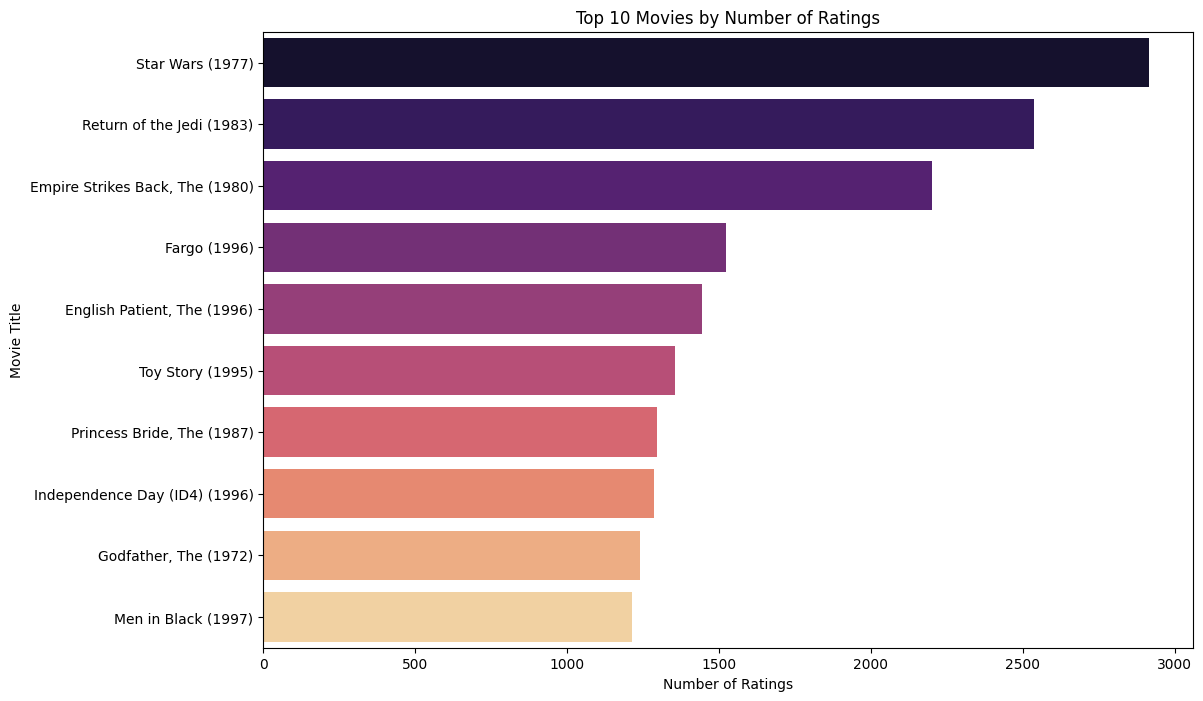

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_movies.values, y=top_10_movies.index, palette='magma')

plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

Are there any significant differences in the preferences for different movie genres between male and female users?


In [20]:
ratings_by_genre_gender = df.groupby(['genre', 'gender'])['rating'].count().unstack()

print(ratings_by_genre_gender)

gender           F      M
genre                    
Action        5442  20147
Adventure     3141  10612
Animation      995   2610
Children's    2232   4950
Comedy        8068  21764
Crime         1794   6261
Documentary    187    571
Drama        11008  28887
Fantasy        363    989
Film-Noir      385   1348
Horror        1197   4120
Musical       1442   3512
Mystery       1314   3931
Romance       5858  13603
Sci-Fi        2629  10101
Thriller      5086  16786
War           2189   7209
Western        371   1483


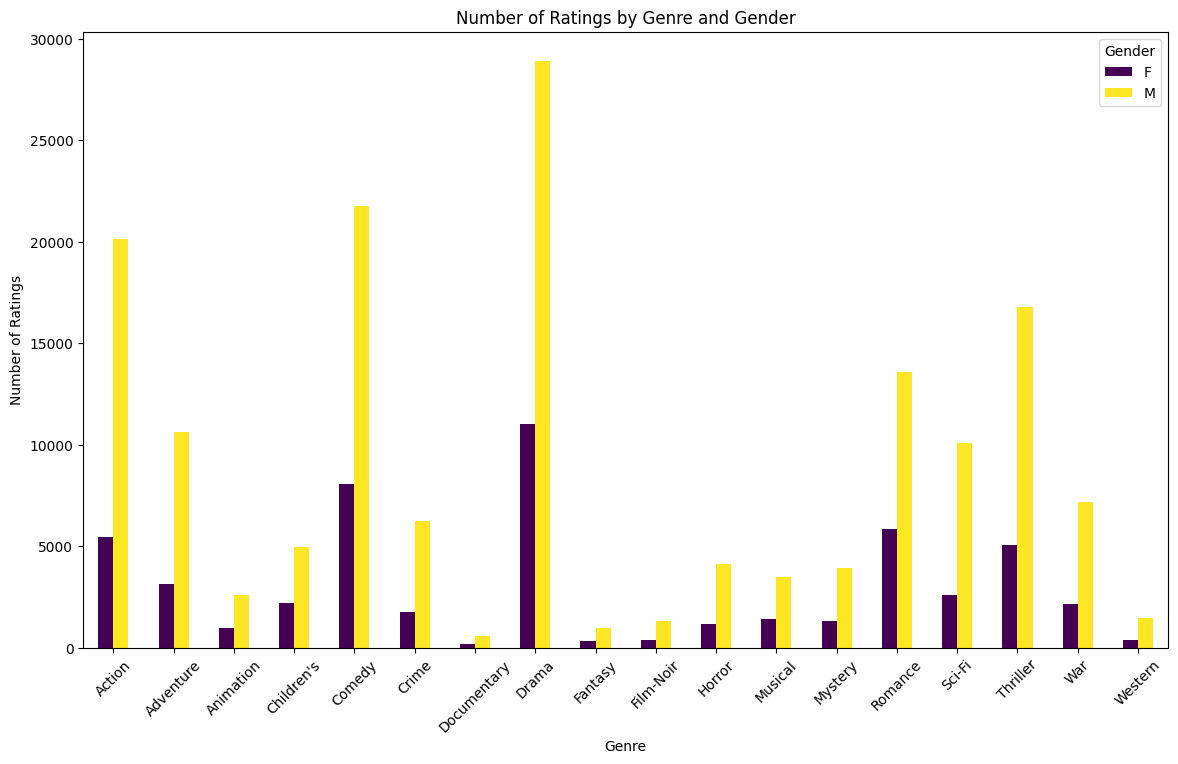

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

ratings_by_genre_gender.plot(kind='bar', figsize=(14, 8), colormap='viridis')

plt.title('Number of Ratings by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Do male or female users rate more movies on average?


In [25]:
ratings_per_user = df.groupby('user_id')['rating'].count()

df_user_ratings = pd.merge(ratings_per_user, df[['user_id', 'gender']].drop_duplicates(), on='user_id')
df_user_ratings.columns = ['user_id', 'num_ratings', 'gender']

df_user_ratings.head()

,user_id,num_ratings,gender
0,1,586,M
1,2,123,F
2,3,122,M
3,4,56,M
4,5,383,F


In [26]:
average_ratings_by_gender = df_user_ratings.groupby('gender')['num_ratings'].mean()
print("Average Number of Ratings per User by Gender:")
print(average_ratings_by_gender)

Average Number of Ratings per User by Gender:
gender
F    196.706960
M    237.140299
Name: num_ratings, dtype: float64


<ipython-input-28-9b54e941ca19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_by_gender.index, y=average_ratings_by_gender, palette='pastel')


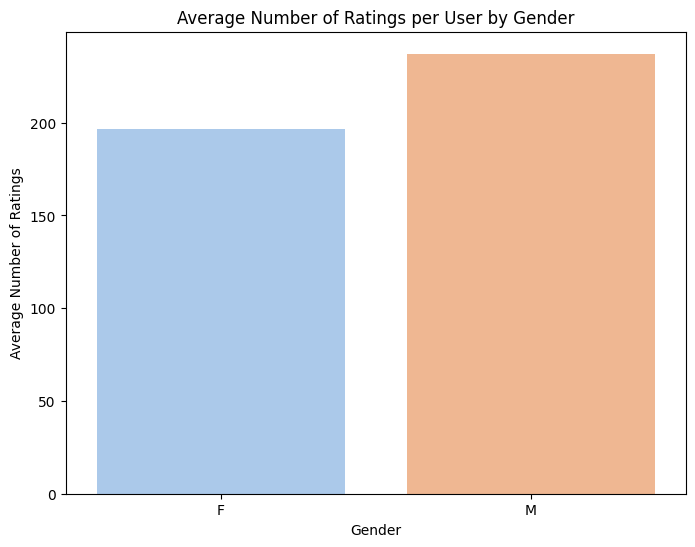

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x=average_ratings_by_gender.index, y=average_ratings_by_gender, palette='pastel')

plt.title('Average Number of Ratings per User by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Ratings')
plt.show()

Which movies have the highest average ratings within each genre?

In [30]:
average_ratings_by_movie_genre = df.groupby(['genre', 'movie_title'])['rating'].mean().reset_index()
average_ratings_by_movie_genre_sorted = average_ratings_by_movie_genre.sort_values(['genre', 'rating'], ascending=[True, False])
average_ratings_by_movie_genre_sorted.head()

,genre,movie_title,rating
207,Action,Star Wars (1977),4.358491
94,Action,"Godfather, The (1972)",4.283293
179,Action,Raiders of the Lost Ark (1981),4.252381
230,Action,Titanic (1997),4.245714
69,Action,"Empire Strikes Back, The (1980)",4.204360


In [34]:
top_rated_movies_by_genre = average_ratings_by_movie_genre_sorted.drop_duplicates('genre', keep='first')
top_rated_movies_by_genre_sorted = top_rated_movies_by_genre.sort_values(by='rating', ascending=False)

print("Top-Rated Movies by Genre Sorted:")
print(top_rated_movies_by_genre_sorted[['genre', 'movie_title', 'rating']])

Top-Rated Movies by Genre Sorted:
            genre                       movie_title    rating
2489       Sci-Fi                   Star Kid (1997)  5.000000
526    Children's                   Star Kid (1997)  5.000000
935        Comedy         Santa with Muscles (1996)  5.000000
1141        Crime    They Made Me a Criminal (1939)  5.000000
1171  Documentary     Great Day in Harlem, A (1994)  5.000000
1213        Drama              Aiqing wansui (1994)  5.000000
1939      Fantasy                   Star Kid (1997)  5.000000
352     Adventure                   Star Kid (1997)  5.000000
394     Animation             Close Shave, A (1995)  4.491071
2559     Thriller             Close Shave, A (1995)  4.491071
2824          War           Schindler's List (1993)  4.466443
2202      Romance                 Casablanca (1942)  4.456790
2156      Mystery                Rear Window (1954)  4.387560
207        Action                  Star Wars (1977)  4.358491
1955    Film-Noir  Manchurian Candid

<ipython-input-50-da6959def1fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-50-da6959def1fa>:6: UserWarning: The palette list has more values (18) than needed (14), which may not be intended.
  sns.barplot(


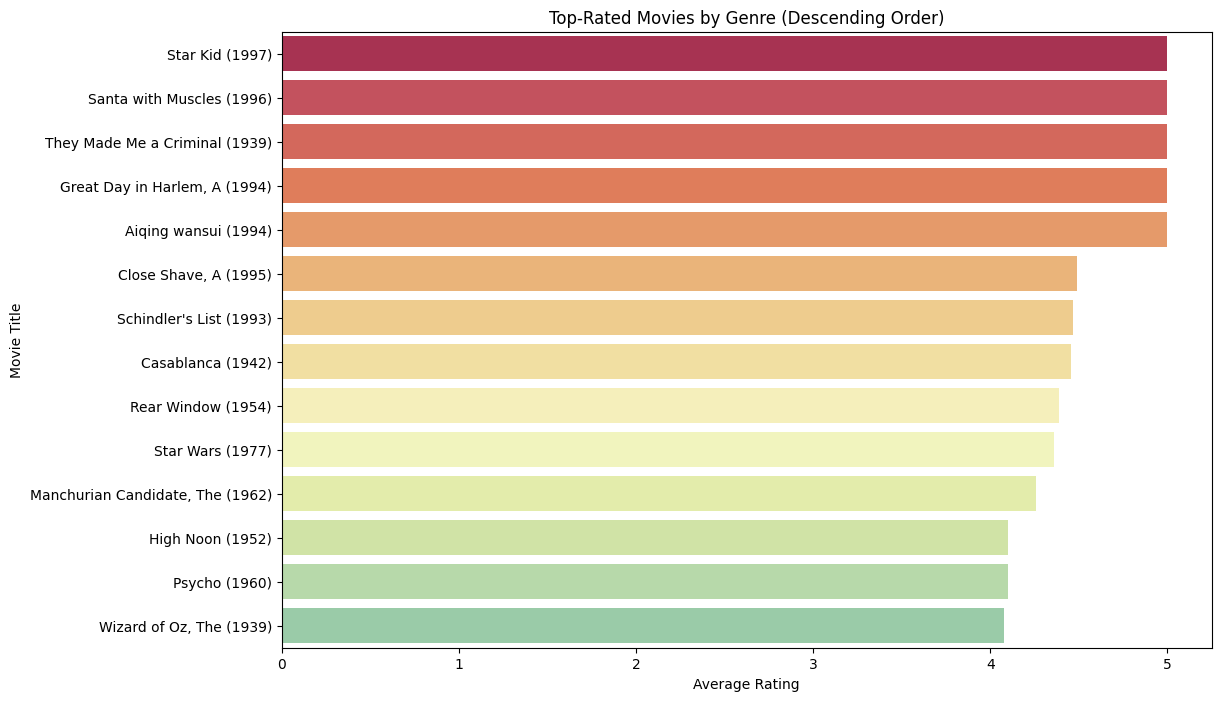

In [50]:
norm = plt.Normalize(top_rated_movies_by_genre_sorted['rating'].min(), top_rated_movies_by_genre_sorted['rating'].max())
sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
sm.set_array([])

plt.figure(figsize=(12, 8))
sns.barplot(
    x='rating',
    y='movie_title',
    data=top_rated_movies_by_genre_sorted,
    palette=sns.color_palette("Spectral", len(top_rated_movies_by_genre_sorted))
)

plt.title('Top-Rated Movies by Genre (Descending Order)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

How do ratings vary across different user age groups?

In [51]:
age_bins = [0, 18, 25, 35, 45, 50, 60, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-59', '60+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
average_ratings_by_age_group = df.groupby('age_group')['rating'].mean()

print("Average Rating by Age Group:")
print(average_ratings_by_age_group)

Average Rating by Age Group:
age_group
<18      3.612087
18-24    3.499417
25-34    3.518682
35-44    3.583798
45-49    3.590615
50-59    3.705162
60+      3.643443
Name: rating, dtype: float64


<ipython-input-51-19a1ca109364>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_by_age_group = df.groupby('age_group')['rating'].mean()


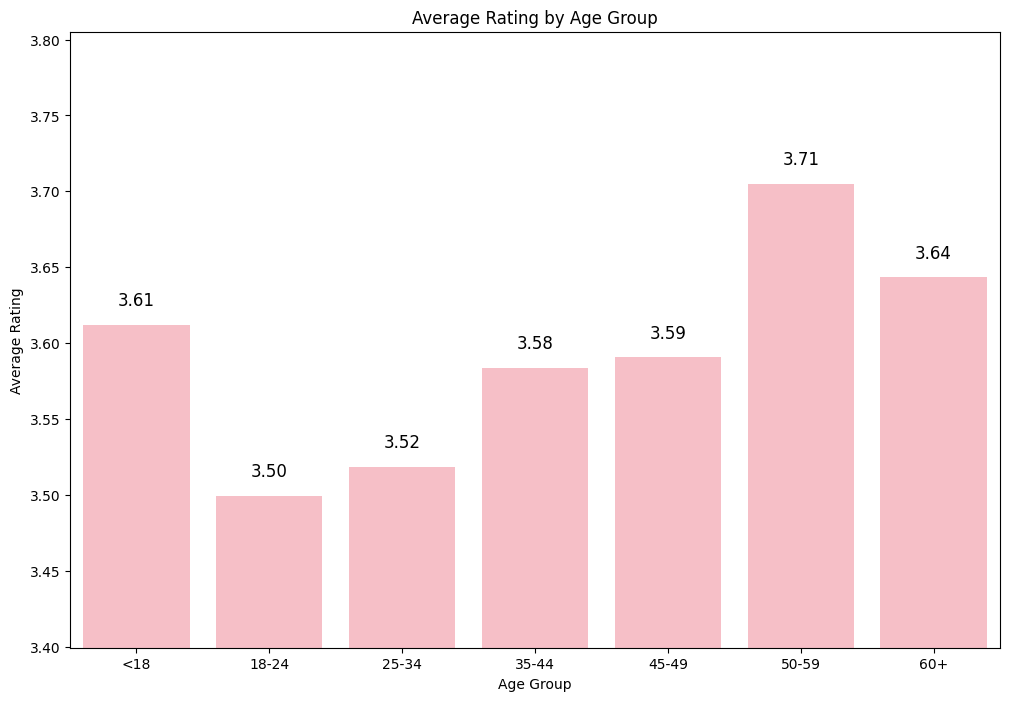

In [62]:
plt.figure(figsize=(12, 8))

# Use a single color for the bars
sns.barplot(
    x=average_ratings_by_age_group.index,
    y=average_ratings_by_age_group.values,
    color='lightpink'
)

# Annotate each bar with the average rating value
for index, value in enumerate(average_ratings_by_age_group.values):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=12)

# Customize plot appearance
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.ylim(average_ratings_by_age_group.min() - 0.1, average_ratings_by_age_group.max() + 0.1)
plt.show()

How do ratings vary across different user occupations?


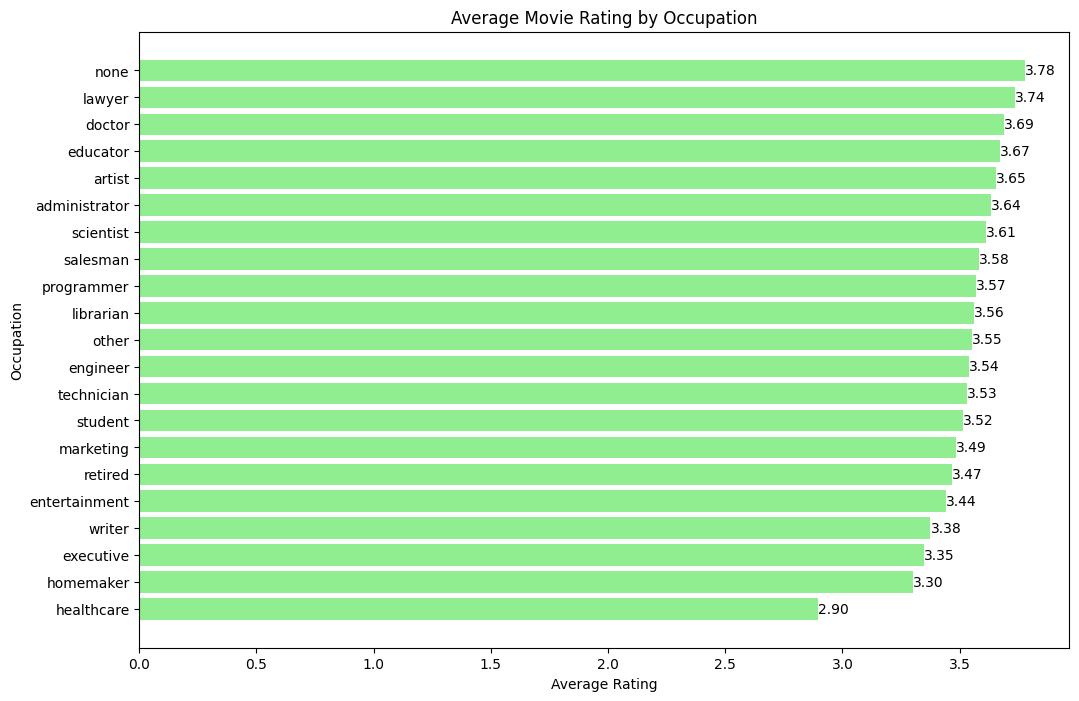

In [65]:
occupation_ratings = data.groupby('occupation')['rating'].mean().reset_index()

occupation_ratings = occupation_ratings.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(occupation_ratings['occupation'], occupation_ratings['rating'], color='lightgreen')
plt.xlabel('Average Rating')
plt.ylabel('Occupation')
plt.title('Average Movie Rating by Occupation')
plt.gca().invert_yaxis()
for index, value in enumerate(occupation_ratings['rating']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

In [67]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'age',
       'gender', 'occupation', 'zip code', 'genre', 'age_group'],
      dtype='object')

Which genres are preferred by different age groups?

<ipython-input-70-a145ae203efd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_preferences = df.groupby(['age_group', 'genre']).agg({'rating': 'mean'}).reset_index()


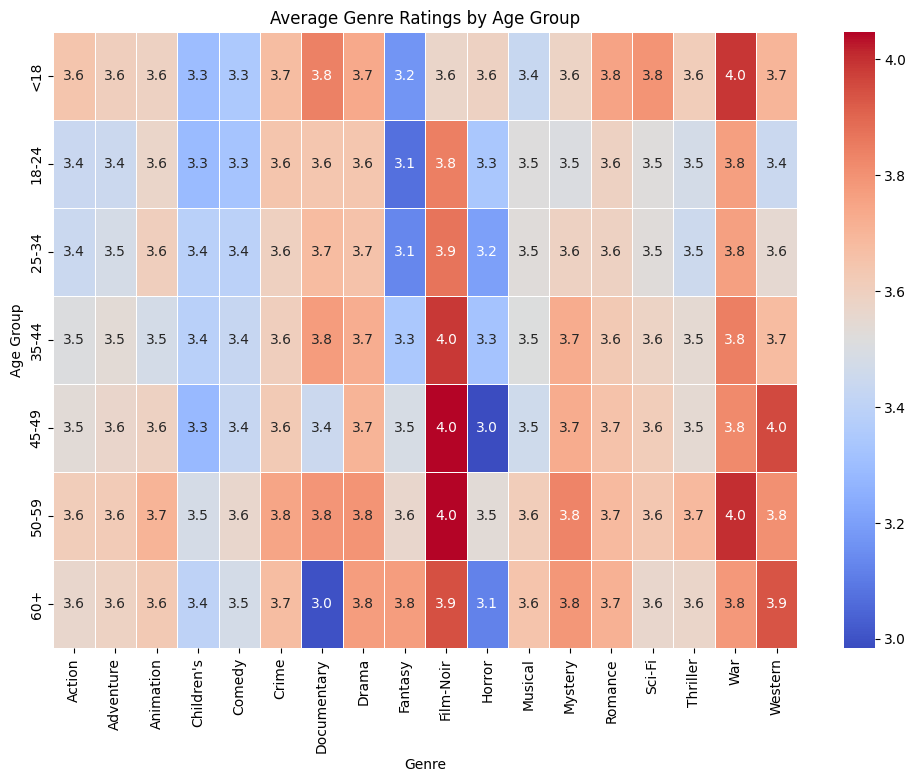

In [70]:
genre_preferences = df.groupby(['age_group', 'genre']).agg({'rating': 'mean'}).reset_index()

pivot_table = genre_preferences.pivot(index='age_group', columns='genre', values='rating')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Average Genre Ratings by Age Group')
plt.xlabel('Genre')
plt.ylabel('Age Group')
plt.show()

How do user preferences evolve over time? Can we observe any shifts in genre popularity?


In [71]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

genre_trends = df.groupby(['year', 'genre']).agg({'rating': 'mean'}).reset_index()

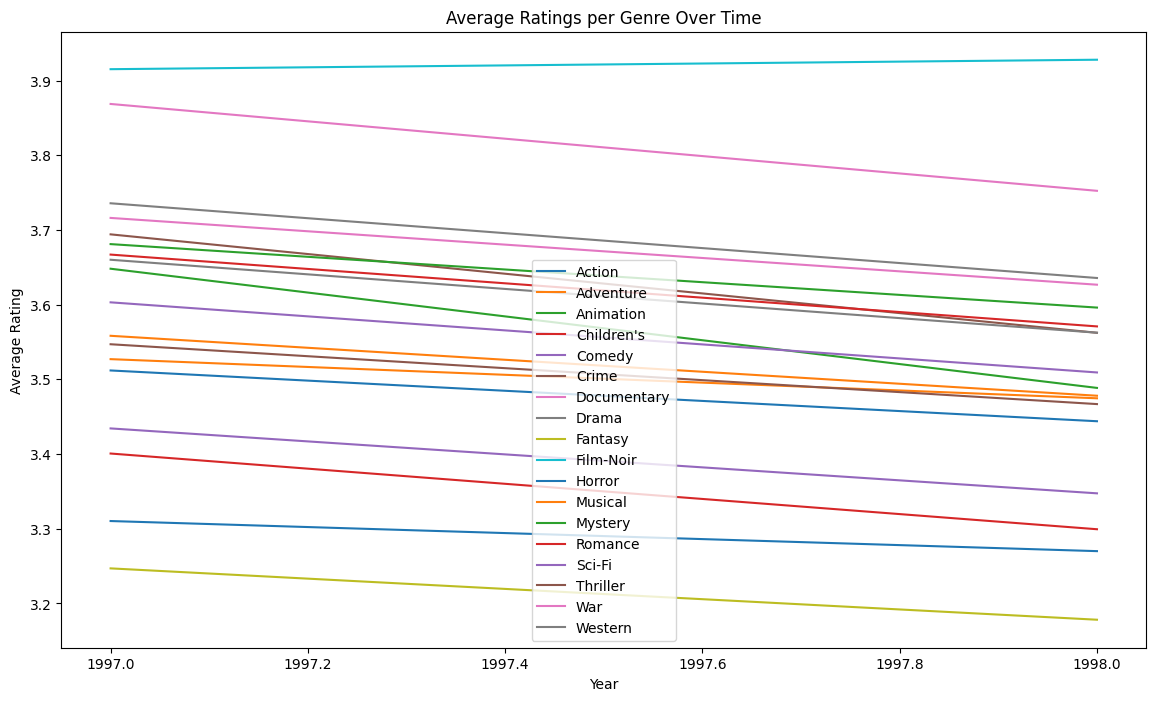

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['year'] = data['timestamp'].dt.year

genre_yearly_ratings = data.explode('genres').groupby(['year', 'genres'])['rating'].mean().unstack().fillna(0)

plt.figure(figsize=(14, 8))
for genre in genre_columns:
    sns.lineplot(data=genre_yearly_ratings[genre], label=genre)

plt.title('Average Ratings per Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.show()